## 模型比较

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# 重置列名
data = pd.read_excel("Concrete_Data.xls")
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]
data = data.rename(columns=mapper)
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 数据标准化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

# 线性回归
lr = LinearRegression()
# 最小角回归
lasso = Lasso()
# 岭回归
ridge = Ridge()
# SVM回归
SVM = svm.SVR()
# KNN回归
KNN = neighbors.KNeighborsRegressor()
# Adaboost回归
Ada = AdaBoostRegressor(n_estimators=100)#这里使用100个决策树
# 决策树回归
dtr = DecisionTreeRegressor()
# 随机森林回归
rfr = RandomForestRegressor(n_estimators=100)
# GBRT回归
GBRT = GradientBoostingRegressor(n_estimators=100)
# Bagging
BR = BaggingRegressor()
# ExtraTree极端随机树回归
ETR = ExtraTreeRegressor()
    
# Fitting models on Training data
# 模型训练
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
SVM.fit(X_train, y_train)
KNN.fit(X_train, y_train)
Ada.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
GBRT.fit(X_train, y_train)
BR.fit(X_train, y_train)
ETR.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
y_pred_KNN = KNN.predict(X_test)
y_pred_Ada = Ada.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_GBRT = GBRT.predict(X_test)
y_pred_BR = BR.predict(X_test)
y_pred_ETR = ETR.predict(X_test)

## 可视化

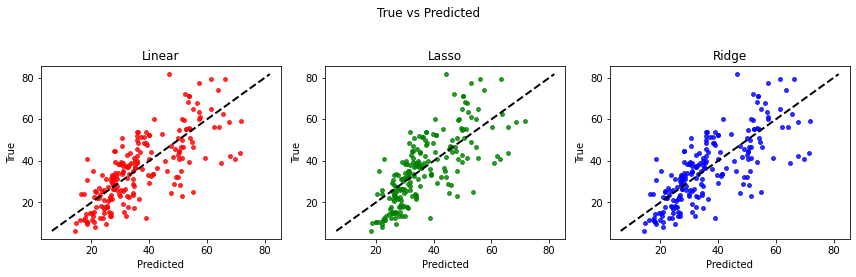

In [6]:
# 一些线性回归模型对比
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=15,c="r",alpha=0.8)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear")

ax2.scatter(y_pred_lasso, y_test, s=15,c="g",alpha=0.8)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso")

ax3.scatter(y_pred_ridge, y_test, s=15,c="b",alpha=0.8)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


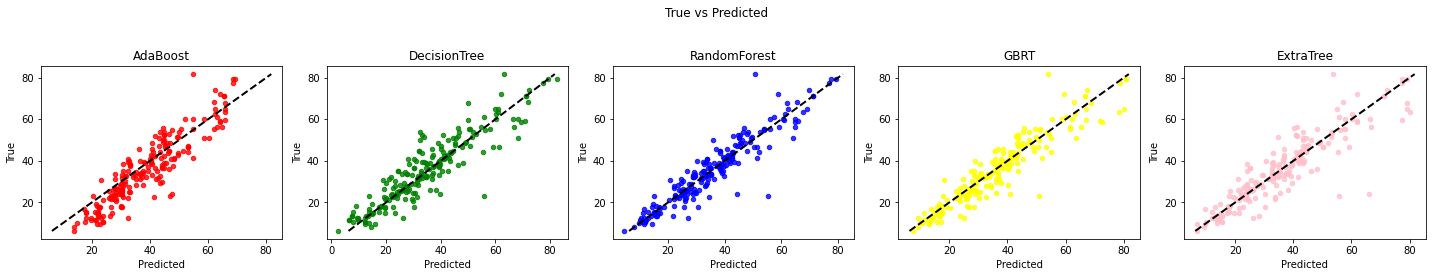

In [17]:
# 决策树类型回归模型对比
fig, (ax4, ax5, ax6, ax7, ax8) = plt.subplots(1,5, figsize=(20,4))

ax4.scatter(y_pred_Ada, y_test, s=20,c="r",alpha=0.8)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_ylabel("True")
ax4.set_xlabel("Predicted")
ax4.set_title("AdaBoost")

ax5.scatter(y_pred_dtr, y_test, s=20,c="g",alpha=0.8)
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_ylabel("True")
ax5.set_xlabel("Predicted")
ax5.set_title("DecisionTree")

ax6.scatter(y_pred_rfr, y_test, s=20,c="b",alpha=0.8)
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax6.set_ylabel("True")
ax6.set_xlabel("Predicted")
ax6.set_title("RandomForest")

ax7.scatter(y_pred_GBRT, y_test, s=20,c="yellow",alpha=0.8)
ax7.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax7.set_ylabel("True")
ax7.set_xlabel("Predicted")
ax7.set_title("GBRT")

ax8.scatter(y_pred_ETR, y_test, s=20,c="pink",alpha=0.8)
ax8.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax8.set_ylabel("True")
ax8.set_xlabel("Predicted")
ax8.set_title("ExtraTree")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


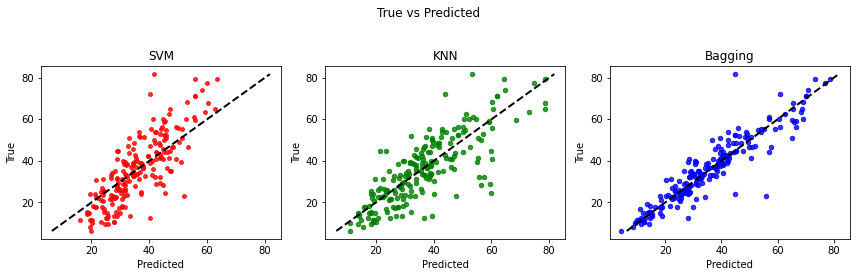

In [12]:
# 其他回归模型对比
fig, (ax9, ax10, ax11) = plt.subplots(1,3, figsize=(12,4))

ax9.scatter(y_pred_SVM, y_test, s=15,c="r",alpha=0.8)
ax9.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax9.set_ylabel("True")
ax9.set_xlabel("Predicted")
ax9.set_title("SVM")

ax10.scatter(y_pred_KNN, y_test, s=20,c="g",alpha=0.8)
ax10.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax10.set_ylabel("True")
ax10.set_xlabel("Predicted")
ax10.set_title("KNN")

ax11.scatter(y_pred_BR, y_test, s=20,c="b",alpha=0.8)
ax11.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax11.set_ylabel("True")
ax11.set_xlabel("Predicted")
ax11.set_title("Bagging")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
